# Lab 2

# Rik

In [1]:
'''# Lab | Customer Analysis Round 2

For this lab, we will be using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder. Check out the `files_for_lab/about.md` to get more information if you are using the Online Excel.

**Note**: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

### Dealing with the data

1. Show the dataframe shape.
2. Standardize header names.
3. Which columns are numerical?
4. Which columns are categorical?
5. Check and deal with `NaN` values.
6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.
7. BONUS: Put all the previously mentioned data transformations into a function.'''

'# Lab | Customer Analysis Round 2\n\nFor this lab, we will be using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder. Check out the `files_for_lab/about.md` to get more information if you are using the Online Excel.\n\n**Note**: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.\n\n### Dealing with the data\n\n1. Show the dataframe shape.\n2. Standardize header names.\n3. Which columns are numerical?\n4. Which columns are categorical?\n5. Check and deal with `NaN` values.\n6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.\n7. BONUS: Put all the previously mentioned data transformations into a function.'

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('./files_for_lab/csv_files/marketing_customer_analysis.csv')

## 1. Show the dataframe shape.

In [10]:
data.shape

(10910, 26)

## 2. Standardize header names.

In [12]:
# First step: retrieve header names. 

data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [11]:
data = data.rename(columns={'EmploymentStatus':'Employment Status'})
data = data.drop(['Unnamed: 0'], axis = 1)

## 3. Which columns are numerical?

In [13]:
data._get_numeric_data().columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

## 4. Which columns are categorical?

In [ ]:
The other ones.

## 5. Check and deal with `NaN` values.

In [22]:
data.isna().sum()

ID number                           0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
Employment Status                   0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [14]:
round(data.isna().sum()/len(data),4)*100

Customer                          0.00
State                             5.78
Customer Lifetime Value           0.00
Response                          5.78
Coverage                          0.00
Education                         0.00
Effective To Date                 0.00
Employment Status                 0.00
Gender                            0.00
Income                            0.00
Location Code                     0.00
Marital Status                    0.00
Monthly Premium Auto              0.00
Months Since Last Claim           5.80
Months Since Policy Inception     0.00
Number of Open Complaints         5.80
Number of Policies                0.00
Policy Type                       0.00
Policy                            0.00
Renew Offer Type                  0.00
Sales Channel                     0.00
Total Claim Amount                0.00
Vehicle Class                     5.70
Vehicle Size                      5.70
Vehicle Type                     50.25
dtype: float64

### 5.1. In which our hero tackles the smaller quantities (everything but vehicle type)

In [ ]:
# This tells me I could drop the rows containing null values for the State, Response, Months Since Last Claim, Number of Open Complaints, Vehicle Class, and Vehicle Size columns.
# I'm also curious if the sets with the same number of NaN values (State&Response, Months Since Last Claim&Number of Open Complaints, Vehicle Class&Vehicle Size) overlap.

In [22]:
print(len(data[(data['State'].isna()) & (data['Response'].isna())]))
print(len(data[(data['Months Since Last Claim'].isna()) & (data['Number of Open Complaints'].isna())]))
print(len(data[(data['Vehicle Class'].isna()) & (data['Vehicle Size'].isna())]))

#And it turns out they do overlap, which makes me all the more confident that I can drop them (since I will only drop a max of 17.28% of columns this way)

631
633
622


In [24]:
# This is where I drop those columns (I just learned that I only need to drop one of the pairs to get rid of all the NaNs)

data = data[data['State'].isna() == False]
data = data[data['Months Since Last Claim'].isna() == False]
data = data[data['Vehicle Class'].isna() == False]

In [26]:
# Check if that worked
data.isna().sum()

Customer                            0
State                               0
Customer Lifetime Value             0
Response                            0
Coverage                            0
Education                           0
Effective To Date                   0
Employment Status                   0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints           0
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
Vehicle Type                     4591
dtype: int64

### 5.2. In which our hero tackles the big beast that is Vehicle Type

In [30]:
#First order of business: see how many unique entries there are

len(data['Vehicle Type'].unique())
data['Vehicle Type'].unique()

array([nan, 'A'], dtype=object)

In [31]:
# It's only NaN and A. This gives me two options: either replace all the NaNs with A's (which gives a pointless data set), or drop the whole column
# I prefer dropping the whole column, to not have some useless data just hanging there.

In [33]:
data = data.drop(['Vehicle Type'], axis = 1)

In [35]:
# And then check if it worked
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [17]:
# Finally, reset the index
data = data.reset_index(drop=True)

## 6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. _Hint_: If data from March does not exist, consider only January and February.

In [49]:
data['month'] = [item.month for item in pd.to_datetime(data['Effective To Date'], errors='coerce')]

#Not the prettiest oneliner, but it gets the job done

In [51]:
#Get data for the first quarter only
data[data['month']<=3]

,ID number,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [ ]:
#PLOT TWIST: It was only ever data for January and February to begin with

## 7. BONUS: Put all the previously mentioned data transformations into a function.

### Note: Erin said to put *all* the above in a function, but I'm doing only the transformations, not the retrieval of info, just to prevent clutter when I re-run it.

In [106]:
import pandas as pd

def cleandata(file):
    
    #Read the data
    data = pd.read_csv(file)
    
    #Standardize header names
    data = data.rename(columns={'Unnamed: 0':'ID number', 'EmploymentStatus':'Employment Status'})
    
    #deal with NaN values
    data = data[data['State'].isna() == False]
    data = data[data['Months Since Last Claim'].isna() == False]
    data = data[data['Vehicle Class'].isna() == False]
    data = data.drop(['Vehicle Type'], axis = 1)
    
    #reset the index
    data = data.reset_index(drop=True)
    
    #months in separate column
    data['month'] = [item.month for item in pd.to_datetime(data['Effective To Date'], errors='coerce')]
    
    return data

In [107]:
# And then I run this function to see if it works (and to initialize for Lab 3 if I close the notebook and come back)

cleandata('./files_for_lab/csv_files/marketing_customer_analysis.csv')

data = cleandata('./files_for_lab/csv_files/marketing_customer_analysis.csv')

# And in the same cell, I also import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lab 3



# Rik

In [ ]:
'''For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.
Get the data

    Use the same jupyter file from the last lab, Customer Analysis Round 3

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

    Show DataFrame info.
    Describe DataFrame.
    Show a plot of the total number of responses.
    Show a plot of the response rate by the sales channel.
    Show a plot of the response rate by the total claim amount.
    Show a plot of the response rate by income.
'''


## Show DataFrame info.

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID number                      9134 non-null   int64  
 1   Customer                       9134 non-null   object 
 2   State                          9134 non-null   object 
 3   Customer Lifetime Value        9134 non-null   float64
 4   Response                       9134 non-null   object 
 5   Coverage                       9134 non-null   object 
 6   Education                      9134 non-null   object 
 7   Effective To Date              9134 non-null   object 
 8   Employment Status              9134 non-null   object 
 9   Gender                         9134 non-null   object 
 10  Income                         9134 non-null   int64  
 11  Location Code                  9134 non-null   object 
 12  Marital Status                 9134 non-null   o

## Describe DataFrame.

In [7]:
data.describe()

,count,mean,std,min,25%,50%,75%,max
ID number,9134.0,5490.357675,3148.183236,0.000000,2764.250000,5508.500000,8218.750000,10908.000000
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
month,9134.0,1.463762,0.498712,1.000000,1.000000,1.000000,2.000000,2.000000


## Show a plot of the total number of responses.

In [29]:
#First check which responses there are and how many of each, so I can check later if I did it right
data['Response'].unique()
# -> only 'No' and 'Yes'

print(len(data[data['Response']=='Yes']), 'x Yes')
print(len(data[data['Response']=='No']), 'x No')

# A scatter plot does not make a lot of sense, since we're dealing with categorial data. I'll do a pie chart instead

1308 x Yes
7826 x No


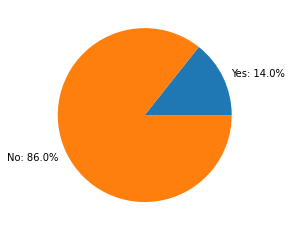

In [42]:
#First, calculate the respective percentages for 'Yes' and 'No' responses

yespercent = len(data[data['Response']=='Yes'])/len(data)*100
nopercent = len(data[data['Response']=='No'])/len(data)*100


#Then, generate labels for the pie chart that show these percentages.
mylabels = ['Yes: '+str(round(yespercent,0))+'%', 'No: '+str(round(nopercent,0))+'%']

#Finally, draw the plot
plt.pie([yespercent, nopercent], labels=mylabels)
plt.show()

## Show a plot of the response rate by the sales channel.

### Chapter 1: getting the relevant data in order

In [44]:
# First, figure out which sales channels there are
data['Sales Channel'].unique()

# And for good measure, store that in a list
channels = data['Sales Channel'].unique()

['Agent' 'Call Center' 'Branch' 'Web']
['Agent' 'Call Center' 'Branch' 'Web']


In [52]:
# Next, figure out the response rates per sales channel
# The first step is to get the total number of entries per sales channels

channeltotals = []
for channel in channels:
    channeltotals.append(len(data[data['Sales Channel']==channel]))
print(channeltotals)

[3477, 1765, 2567, 1325]


In [56]:
# The next step is to get the number of yeses for each sales channel

channelyes = []
for channel in channels:
    channelyes.append(len(data[(data['Sales Channel']==channel) & (data['Response']=='Yes')]))
print(channelyes)

[666, 192, 294, 156]


In [70]:
# Then get percentages of yes per channel
yes_percent_channel = []
for i in range(4):
    yes_percent_channel.append(round((channelyes[i]/channeltotals[i]*100),2))

### Chapter 2: The (mat)plot(lib) thickens

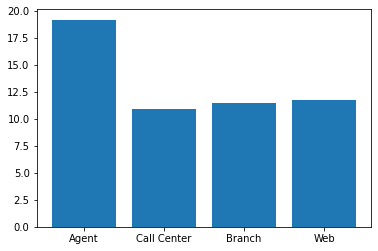

In [76]:
plt.bar(channels,yes_percent_channel)
plt.show()

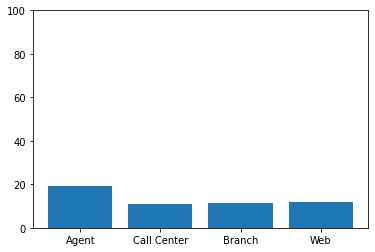

In [77]:
# And then make it prettier by adding labels and having the chart go all the way up to 100%
plt.bar(channels,yes_percent_channel)
plt.ylim(0,100)
plt.xlabel='Sales Channel'
plt.ylabel='Response rate (in %)'

# Ok, going up to 100% is not exactly 'prettier', but it is more representative of the actual situation

## Show a plot of the response rate by the total claim amount.

In [ ]:
# This is a tough one - I have to decide how to simplify the 'total claim amount'
# It seems to be a good first approximation to do another bar chart, with the quartiles on the x axis and the response rate (per quartile) on the y

In [86]:
# I'll be lazy and copy-paste the quartiles from data.describe():
#min: 0.099007 25%: 272.258244 50%: 383.945434 75%: 547.514839 max: 2893.239678

#First I'll get the total number of entries for each of the quartiles
firsttotal=len(data[(data['Total Claim Amount']> 0) & (data['Total Claim Amount'] <= 272.258)])
secondtotal=len(data[(data['Total Claim Amount']> 272.258) & (data['Total Claim Amount'] <= 383.945)])
thirdtotal=len(data[(data['Total Claim Amount']> 383.945) & (data['Total Claim Amount'] <= 547.515)])
fourthtotal=len(data[(data['Total Claim Amount']> 547.515) & (data['Total Claim Amount'] <= 2893.24)])

print(firsttotal, secondtotal, thirdtotal, fourthtotal)

#And as I'm looking at this I realize this could have been easier by just taking 25% of the total. D'oh.

2284 2283 2283 2284


0.09194395796847636 0.1628721541155867 0.1786339754816112 0.13922942206654992
9.19 16.29 17.86 13.92


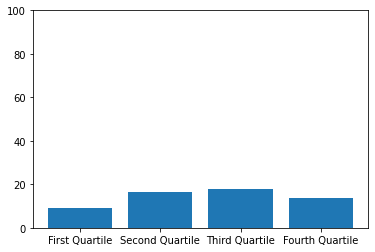

In [96]:
first = len(data[(data['Total Claim Amount']> 0) & (data['Total Claim Amount'] <= 272.258) & (data['Response'] == 'Yes')])/2284
second = len(data[(data['Total Claim Amount']> 272.258) & (data['Total Claim Amount'] <= 383.945) & (data['Response'] == 'Yes')])/2284
third = len(data[(data['Total Claim Amount']> 383.945) & (data['Total Claim Amount'] <= 547.515) & (data['Response'] == 'Yes')])/2284
fourth = len(data[(data['Total Claim Amount']> 547.515) & (data['Total Claim Amount'] <= 2893.24) & (data['Response'] == 'Yes')])/2284

print(first, second, third, fourth)

# I'm cutting this up into several steps because the code is getting unwieldy and hard to debug

first = round(first*100, 2)
second = round(second*100, 2)
third = round(third*100, 2)
fourth = round(fourth*100,2)

print(first, second, third, fourth)


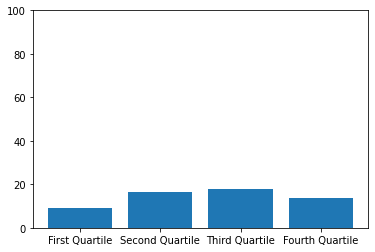

In [97]:
# And here comes the plot

plt.bar(['First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile'],[first,second,third,fourth])
plt.ylim(0,100)
plt.xlabel='Total Claim Amount (in $)'
plt.ylabel='Response rate (in %)'

plt.show()

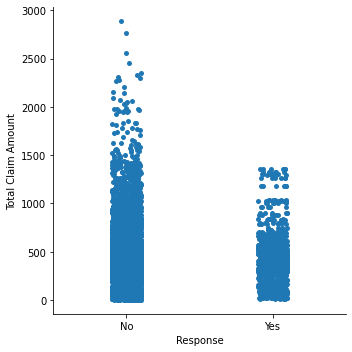

In [110]:
# Trying something with seaborn

sns.catplot(data=data, x='Response', y='Total Claim Amount')

## Show a plot of the response rate by income.

In [ ]:
# This case looks a lot like the previous one (on the total claim amount), except that the first quartile consists entirely of people with 0 income.
# Nevertheless, I'll do the exact same thing again, if only to get a first idea of what the distribution looks like.

In [100]:
#Here comes the copy-pasted data:
# 0.000000 	0.000000 	33889.500000 	62320.000000 	99981.000000

#Using variable names 'FirstA' but in lowercase. Sounds like JarJar Binks, I know - but I don't want any interference with the above chart by re-using variable names.

firsta = len(data[(data['Income']> 0) & (data['Income'] <= 0) & (data['Response'] == 'Yes')])/2284
seconda = len(data[(data['Income']> 0) & (data['Income'] <= 33889.5) & (data['Response'] == 'Yes')])/2284
thirda = len(data[(data['Income']> 33889.5) & (data['Income'] <= 62320) & (data['Response'] == 'Yes')])/2284
fourtha = len(data[(data['Income']> 62320) & (data['Income'] <= 99981) & (data['Response'] == 'Yes')])/2284

print(firsta, seconda, thirda, fourtha)

firsta = round(firsta*100, 2)
seconda = round(seconda*100, 2)
thirda = round(thirda*100, 2)
fourtha = round(fourtha*100,2)

print(firsta, seconda, thirda, fourtha)

0.0 0.20490367775831875 0.14448336252189142 0.13660245183887915
0.0 20.49 14.45 13.66


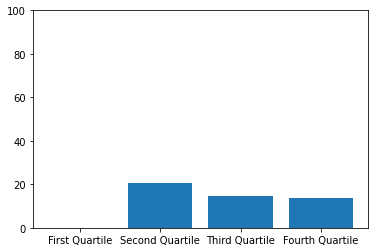

In [101]:
plt.bar(['First Quartile', 'Second Quartile', 'Third Quartile', 'Fourth Quartile'],[firsta,seconda,thirda,fourtha])
plt.ylim(0,100)
plt.xlabel='Total Claim Amount (in $)'
plt.ylabel='Response rate (in %)'

plt.show()

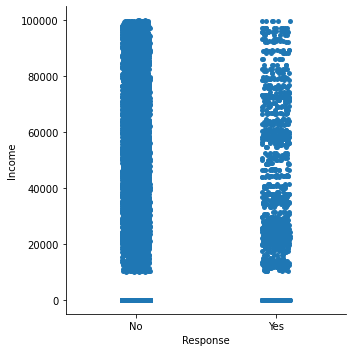

In [111]:
# And do the seaborn thing again

sns.catplot(data=data, x="Response", y="Income")